<a href="https://colab.research.google.com/github/Ishka08/mochiiii/blob/main/Bp_assignment_Enron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction


This report will assist users in reflecting on previous facts, planning for the future, understanding a scenario, or proposing solutions to a challenge. A business report is a compilation of facts and analysis that assists a corporation in making key information readily available. There are several sorts of company reports, but this tutorial will walk you through the basics (Reno, n.d.). This report will consist of a graph which will indicate the number of messages each day and a donut indicating the top ten emailers of the business, an analysis of the graph and the references.

##About Enron

Enron was a Houston-based energy trader and utility corporation that committed one of the largest financial scams in history. Enron's leaders used deceptive accounting procedures to exaggerate the firm 's earnings, allowing it to become the seventh-largest firm in the United States for a period(Chen, 2019).

##Plot of:number of messages each day by date.


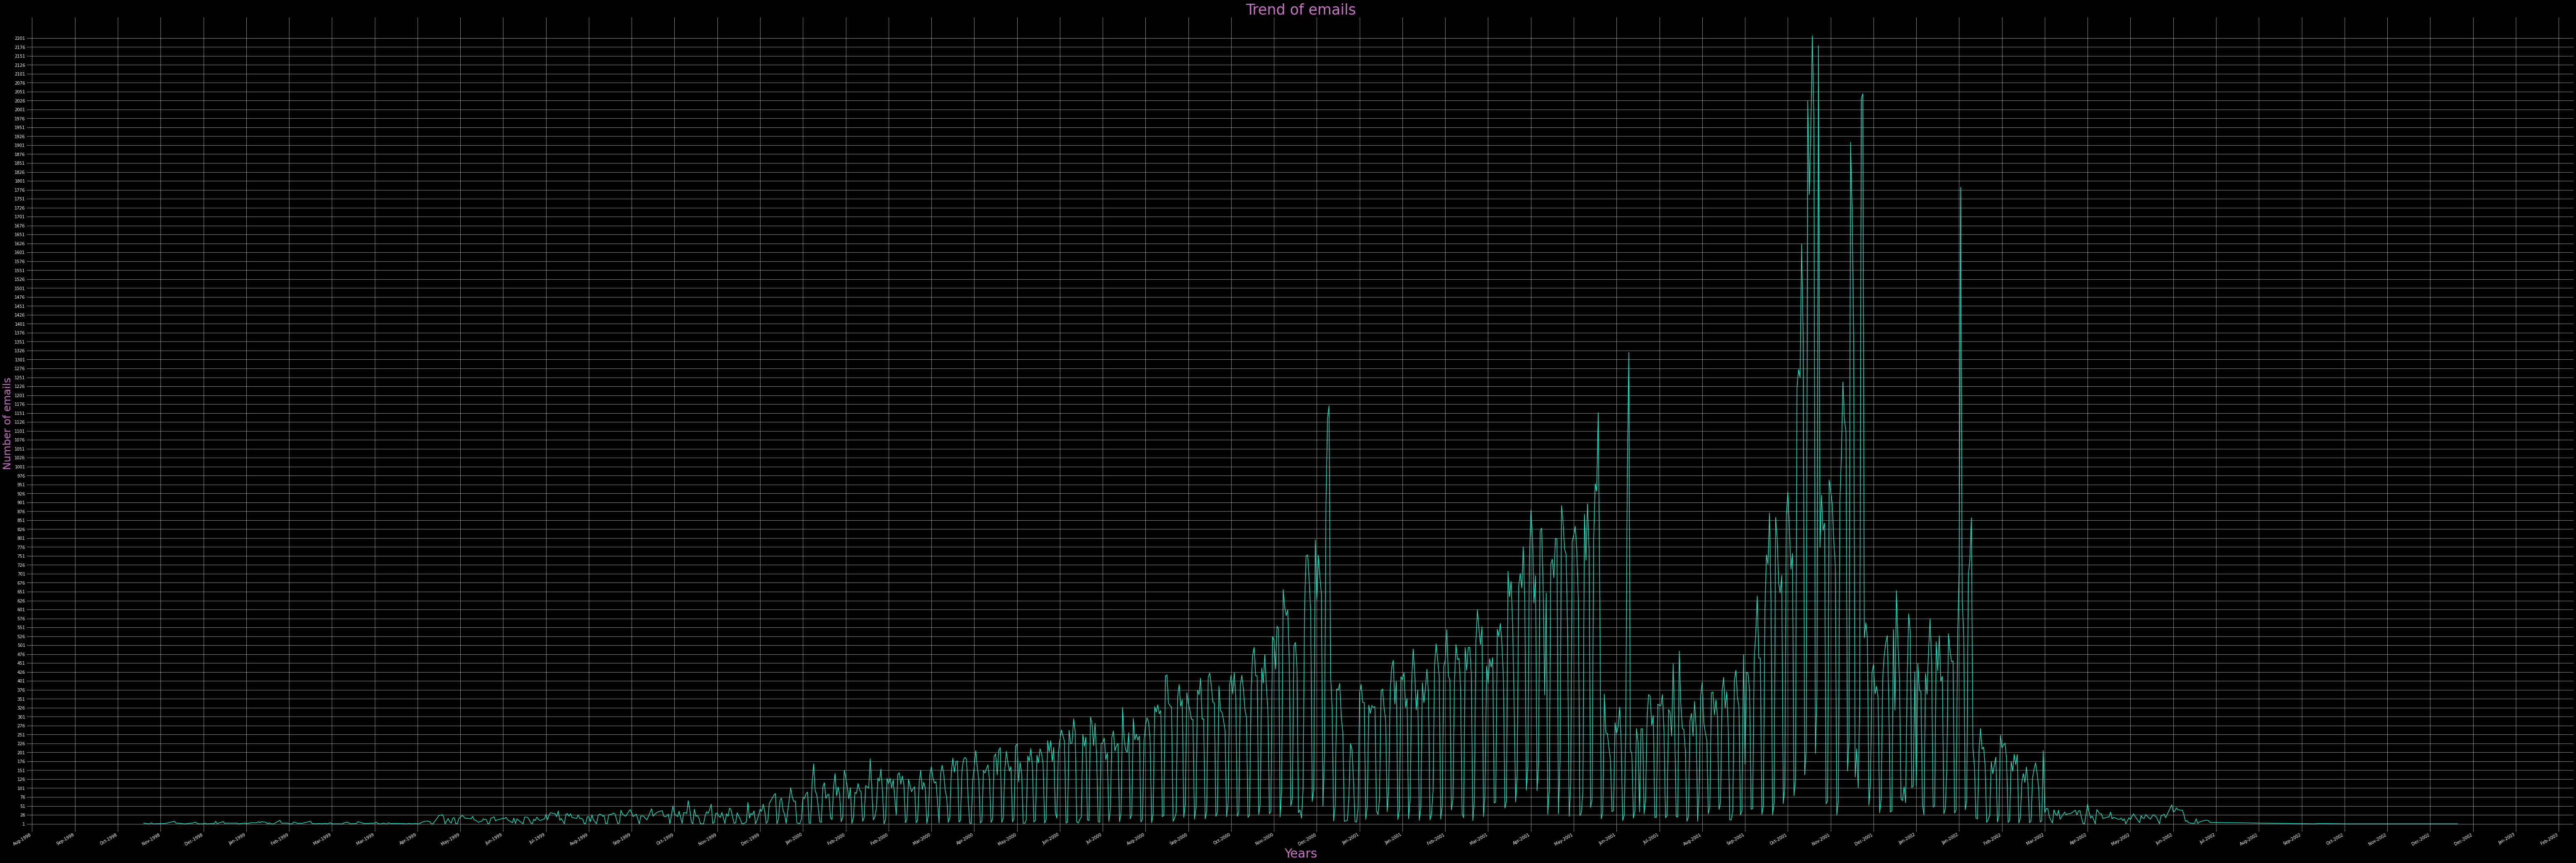

In [6]:
!wget -O full.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1 -q
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3 as sql
import datetime as dtime
import matplotlib.dates as mdates
conn = sql.connect('full.db')
#makes the 1st row the current row with cursor ptr
cur = conn.cursor()
sql = """
 SELECT COUNT(mid),message.sender ,date(message.date) 
FROM message
WHERE date(message.date) BETWEEN '1998-05-30' and '2003-01-30'
GROUP BY date(message.date)
Order BY date(message.date) ASC;
   """


# Execute query and commit transaction
result=cur.execute(sql)
conn.commit()
countmess = []
sender = []
dates=[]


#reading row results from SQL Query
for row in result:
  #try date parsing into dateval of ANSI epoch.
  try:
    countmess.append(str(row[0]))
    sender.append(str(row[1]))
    dates.append(pd.to_datetime(row[2]))
    #print the erroneous dateval(s)
  except:
    print (row[2])

conn.close()
#Parse String  LIST countmess to INTEGER
countmess = [int(i) for i in countmess]

#setting fig size (Cartesian plane)
fig, ax = plt.subplots(figsize=(110, 40))
plt.yticks(np.arange(min(countmess), max(countmess)+1, 25))
ax.set_title('Trend of emails', fontsize= 35, color= '#C875C4')
ax.set_xlabel('Years', fontsize= 30, color= '#C875C4')
ax.set_ylabel('Number of emails', fontsize= 25, color= '#C875C4')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax.set_facecolor('#010101')

#ax.tick_params(axis='x', colors= '#ffffff')
#ax.tick_params(axis='y', colors= '#ffffff')
ax.tick_params(axis='both', colors= '#ffffff')
plt.ylim(-15, 2260)
plt.xlim()
ax.grid()
ax.plot(dates, countmess, color= '#13EAC9')
fig.set_facecolor('#010101')

fig.autofmt_xdate()


## necessary variables

##Analysis of the graph.

The amount of email started to have a slight increase in April in the year 1999. It then had a higher increase in January 2000 and continued to increase consistently. the number of emails reached a peak of approximately 2000 emails per day in the year 2001 between October and November. It then started to decrease around December 2001 but had another high increase in January 2002. It decreased in February and it March leading to around 20 emails until June to approximately 1 email per day for the rest of 2002.

##Donut representing who are the top ten emailers of the organisation.

In [2]:
import sqlite3 as sql
conn = sql.connect('full.db')
#makes the 1st row the current row with cursor ptr
cur = conn.cursor()
sql = """
SELECT COUNT(mid), message.sender
FROM message
GROUP BY sender
ORDER BY COUNT(mid) DESC
LIMIT 10;
"""
result = cur.execute(sql)
conn.commit()
countmess = []
sender = []

In [3]:
for row in result:
  #try date parsing into dateval of ANSI epoch.
  try:
    countmess.append(str(row[0]))
    sender.append(str(row[1]))
    #print the erroneous dateval(s)
  except:
    print (row[1])

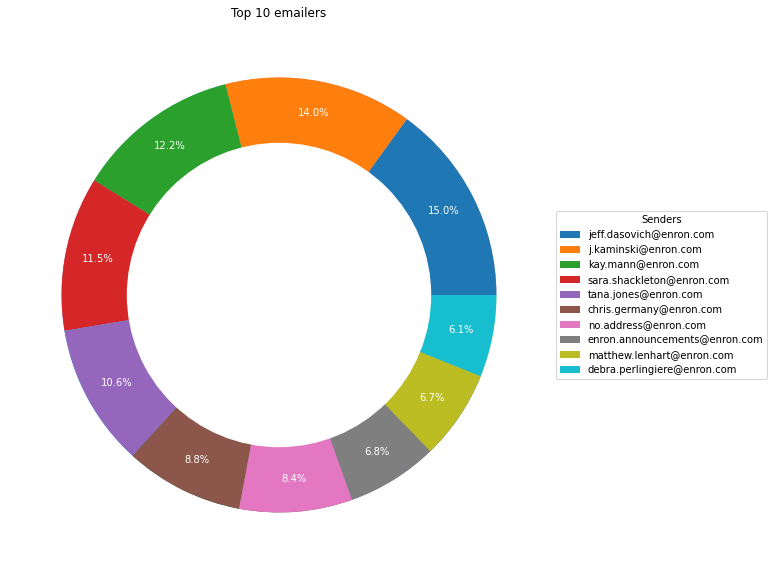

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sqlite3 as sql


conn = sql.connect('full.db')

#makes the 1st row the current row with cursor ptr
cur = conn.cursor()
sql = """
 SELECT COUNT(mid), message.sender
FROM message
GROUP BY sender
ORDER BY COUNT(mid) DESC
LIMIT 10;
   """
# Execute query and commit transaction
result=cur.execute(sql)
#commit the transaction
conn.commit()
countmess = []
sender = []

#reading row results from SQL Query
for row in result:
  #try date parsing into dateval of ANSI epoch.
  try:
    countmess.append(str(row[0]))
    sender.append(str(row[1]))
    #print the erroneous dateval(s)
  except:
    print (row[1])

conn.close()
#Parse String  LIST countmess to INTEGER
countmess = [int(i) for i in countmess]



colors = ['#ffc0cb', '#f3767a', '#42c0ab','#9f7db8', '#0ca9dc','#00855b','#8a4e5d','#6a84c1','#334693','#e2e357']
 

fig, ax = plt.subplots(figsize=(10, 10))
# Pie Chart
plt.pie(countmess, colors= colors,
        autopct='%1.1f%%', pctdistance=0.85, textprops={'color':"w"})

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Top 10 emailers')

#plt.setp(autotexts, size=8, weight="bold")


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(countmess, autopct=lambda pct: func(pct, countmess),
                                  textprops=dict(color="w"))

ax.legend(wedges, sender,
          title="Senders",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))



# Displaying Chart
plt.show()

##Conclusion


## References

‌Chen, J. (2019). Enron. Investopedia. https://www.investopedia.com/terms/e/enron.asp

color wheel - Google Search. (n.d.). Www.google.com. Retrieved May 27, 2022, from https://www.google.com/search?q=color+wheel&client=firefox-b-d&sxsrf=ALiCzsa2dvqYejB-ywvlVtiMAcXrcaod5Q:1653549497926&source=lnms&tbm=isch&sa=X&ved=2ahUKEwj6z8Tzz_z3AhXli_0HHWBeDN8Q_AUoAXoECAIQAw&biw=1536&bih=703&dpr=1.25#imgrc=OyT2jz63uORK-M
‌

Reno, U. of N. (n.d.). How to Write a Business Report | 
University Writing & Speaking Center. University of Nevada, Reno. https://www.unr.edu/writing-speaking-center/student-resources/writing-speaking-resources/how-to-write-a-business-report

Specifying Colors — Matplotlib 3.5.0 documentation. (n.d.). Matplotlib.org. Retrieved May 27, 2022, from https://matplotlib.org/3.5.0/tutorials/colors/colors.html

‌
‌